# Flight price prediction of Hackathon data

### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [18]:
data=train_df.append(test_df, sort=False)

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [20]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [21]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering

In [22]:
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

In [92]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [72]:
data=data.drop(['Date_of_Journey'], axis=1)

In [73]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [74]:
data.dtypes

Airline              int32
Source               int32
Destination          int32
Additional_Info      int32
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_hour         int32
Arrival_minute       int32
Dep_hour             int32
Dep_minute           int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Route_5              int32
dtype: object

In [78]:
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [79]:
data.dtypes

Airline              int32
Source               int32
Destination          int32
Additional_Info      int32
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_hour         int32
Arrival_minute       int32
Dep_hour             int32
Dep_minute           int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Route_5              int32
dtype: object

In [93]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]

KeyError: 'Arrival_Time'

In [75]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [77]:
data[data['Total_Stops'].isnull()]

KeyError: 'Total_Stops'

In [31]:
data['Total_Stops']=data['Total_Stops'].fillna('1 stops')

In [32]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop', '0 stops')

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stops,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [34]:
data['Stops']=data['Total_Stops'].str.split(' ').str[0]

In [35]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stops,No info,3897.0,24,3,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [36]:
data['Stops']=data['Stops'].astype(int)
data=data.drop(['Total_Stops'],axis=1)

In [62]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [37]:
data['Arrival_hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_minute']=data['Arrival_Time'].str.split(':').str[1]

In [38]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [39]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_hour        object
Arrival_minute      object
dtype: object

In [40]:
data['Arrival_hour']=data['Arrival_hour'].astype(int)
data['Arrival_minute']=data['Arrival_minute'].astype(int)

In [41]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_hour         int32
Arrival_minute       int32
dtype: object

In [42]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [43]:
data=data.drop(['Arrival_Time'], axis=1)

In [44]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [45]:
data['Dep_hour']=data['Dep_Time'].str.split(':').str[0]
data['Dep_minute']=data['Dep_Time'].str.split(':').str[1]

In [46]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [47]:
data=data.drop(['Dep_Time'], axis=1)

In [48]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [49]:
data['Dep_hour']=data['Dep_hour'].astype(int)
data['Dep_minute']=data['Dep_minute'].astype(int)

In [50]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_hour         int32
Arrival_minute       int32
Dep_hour             int32
Dep_minute           int32
dtype: object

In [51]:
data['Route_1']=data['Route'].str.split('→ ').str[0]
data['Route_2']=data['Route'].str.split('→ ').str[1]
data['Route_3']=data['Route'].str.split('→ ').str[2]
data['Route_4']=data['Route'].str.split('→ ').str[3]
data['Route_5']=data['Route'].str.split('→ ').str[4]

In [52]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,...,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,...,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,...,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,...,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,...,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,...,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [53]:
data['Route_1'].fillna("None",inplace=True)
data['Route_2'].fillna("None",inplace=True)
data['Route_3'].fillna("None",inplace=True)
data['Route_4'].fillna("None",inplace=True)
data['Route_5'].fillna("None",inplace=True)

In [54]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,...,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,...,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,...,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,...,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,...,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,...,1,21,35,16,50,BLR,NAG,DEL,None,None


In [55]:
data=data.drop(['Route'],axis=1)

In [56]:
data=data.drop(['Duration'], axis=1)

In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,9/06/2019,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,12/05/2019,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [58]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data["Airline"]=Encoder.fit_transform(data['Airline'])
data["Source"]=Encoder.fit_transform(data['Source'])
data["Destination"]=Encoder.fit_transform(data['Destination'])
data["Additional_Info"]=Encoder.fit_transform(data['Additional_Info'])
data["Route_1"]=Encoder.fit_transform(data['Route_1'])
data["Route_2"]=Encoder.fit_transform(data['Route_2'])
data["Route_3"]=Encoder.fit_transform(data['Route_3'])
data["Route_4"]=Encoder.fit_transform(data['Route_4'])
data["Route_5"]=Encoder.fit_transform(data['Route_5'])

In [82]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [83]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [84]:
df_train=data[0:10683]
df_test=data[10683:]

In [85]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [87]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [88]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [89]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [90]:
selected_features=X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_hour', 'Arrival_minute', 'Dep_hour', 'Dep_minute',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [91]:
X_train=X_train.drop(['Year'],axis=1)
X_test=X_test.drop(['Year'],axis=1)

## RandomForest Regressor

In [94]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [95]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [96]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [97]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   5.4s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 29.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [99]:
y_pred=rf_random.predict(X_test)

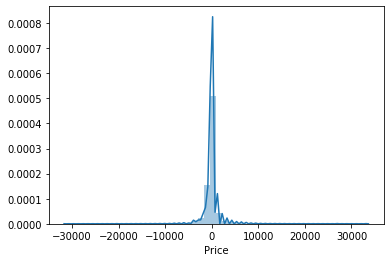

In [100]:
import seaborn as sns

sns.distplot(y_test-y_pred)

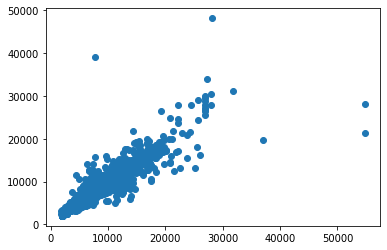

In [101]:
plt.scatter(y_test,y_pred)